In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import tensorflow as tf
import string
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
train = pd.read_csv('written_name_train_v2.csv.zip')
valid = pd.read_csv('written_name_validation_v2.csv.zip')

In [ ]:
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [ ]:
valid.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


In [ ]:
train.describe()

,FILENAME,IDENTITY
count,330961,330396
unique,330961,100539
top,TRAIN_00001.jpg,THOMAS
freq,1,1825


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [ ]:
train.shape

(330961, 2)

In [ ]:
valid.shape

(41370, 2)

In [ ]:
train.value_counts()

FILENAME          IDENTITY 
TRAIN_00001.jpg   BALTHAZAR    1
TRAIN_291526.jpg  CAMPOURCY    1
TRAIN_291506.jpg  BELLO        1
TRAIN_291505.jpg  BOISSIERE    1
TRAIN_291504.jpg  LOUNA        1
                              ..
TRAIN_191201.jpg  CHOMEL       1
TRAIN_191200.jpg  BARDIN       1
TRAIN_19120.jpg   LAURI-ANN    1
TRAIN_191199.jpg  TILLEMAN     1
TRAIN_99999.jpg   DIMITRI      1
Name: count, Length: 330396, dtype: int64

In [ ]:
train.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [ ]:
valid.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [ ]:
valid.columns

Index(['FILENAME', 'IDENTITY'], dtype='object')

In [ ]:
train.columns

Index(['FILENAME', 'IDENTITY'], dtype='object')

In [ ]:
train.isnull().sum()

FILENAME      0
IDENTITY    565
dtype: int64

In [ ]:
valid.isnull().sum()

FILENAME     0
IDENTITY    78
dtype: int64

In [ ]:
train.isnull().any()

FILENAME    False
IDENTITY     True
dtype: bool

In [ ]:
train=train.dropna()

In [ ]:
valid=valid.dropna()

In [ ]:
train.isnull().sum()

FILENAME    0
IDENTITY    0
dtype: int64

In [ ]:
valid.isnull().sum()

FILENAME    0
IDENTITY    0
dtype: int64

In [ ]:
train.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [ ]:
#lets find the categorialfeatures
list_1=list(train.columns)


In [ ]:
list_cate=[]
for i in list_1:
    if train[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    train[i]=le.fit_transform(train[i])

In [ ]:
train

,FILENAME,IDENTITY
0,0,6790
1,1,88373
2,2,9411
3,3,54452
4,4,24870
...,...,...
330956,263609,59046
330957,263610,92820
330958,263611,23178
330959,263613,70125


In [ ]:
X = train.drop('FILENAME',axis=1)
y = train['FILENAME']


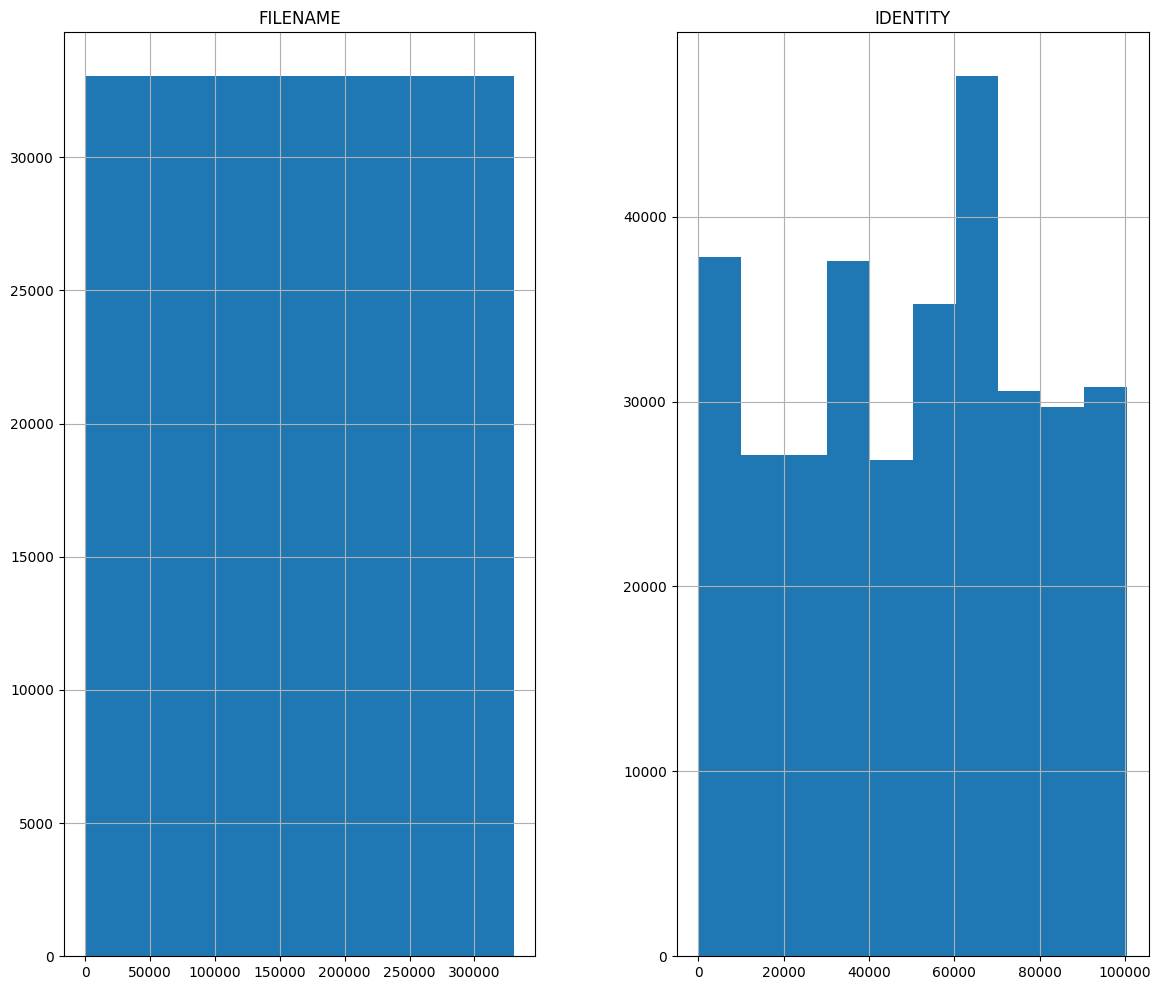

In [ ]:
train.hist(figsize=(14,12))
plt.show()

In [ ]:
train.corr()

,FILENAME,IDENTITY
FILENAME,1.000000,0.000385
IDENTITY,0.000385,1.000000


<Axes: >

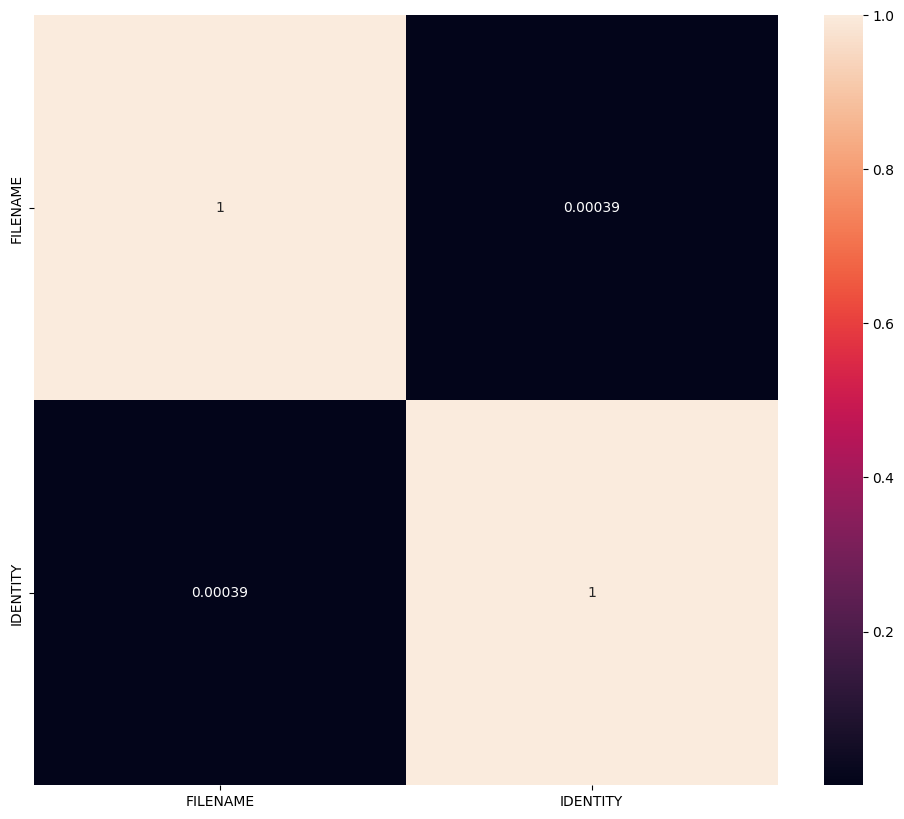

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(train.corr(), annot =True)

<Axes: xlabel='IDENTITY'>

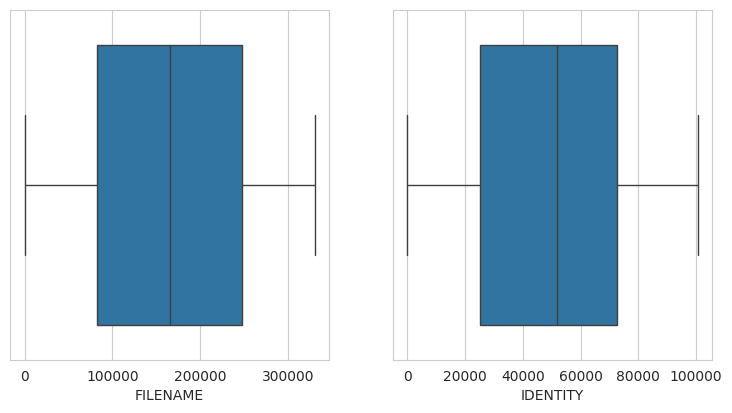

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='FILENAME',data=train)
plt.subplot(2,3,2)
sns.boxplot(x='IDENTITY',data=train)



<Axes: ylabel='Frequency'>

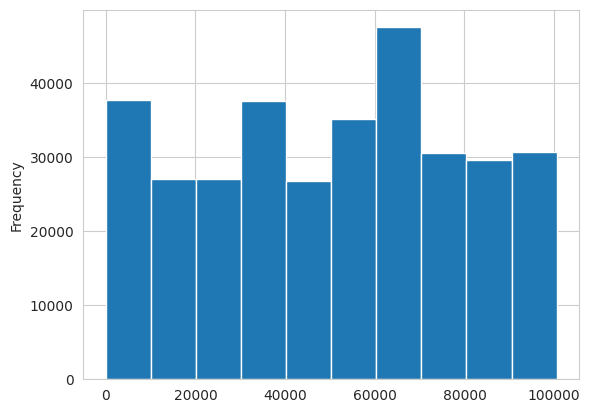

In [ ]:
train['IDENTITY'].plot(kind='hist')

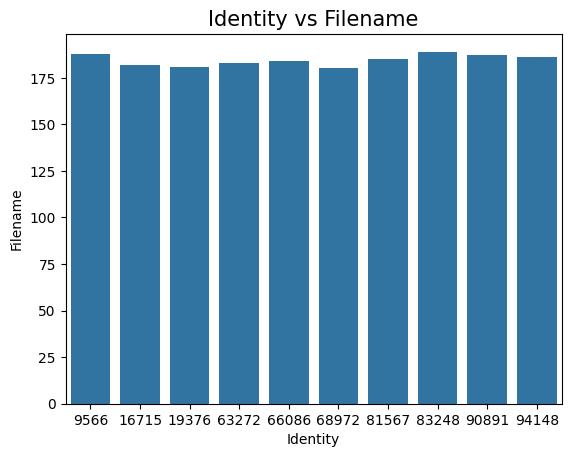

In [ ]:
plt.style.use("default")
sns.barplot(x="IDENTITY", y="FILENAME",data=train[180:190])
plt.title("Identity vs Filename",fontsize=15)
plt.xlabel("Identity")
plt.ylabel("Filename")
plt.show()


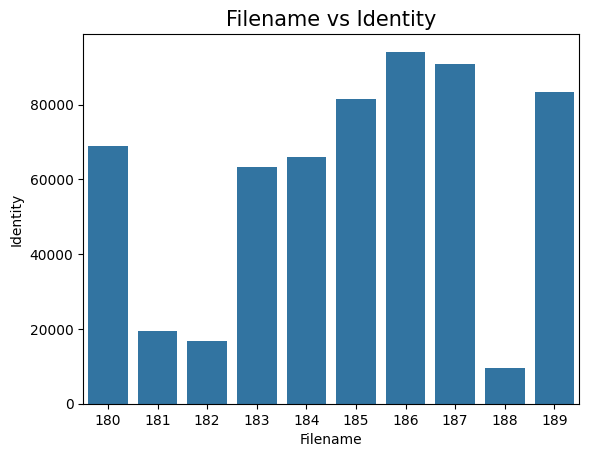

In [ ]:
plt.style.use("default")
sns.barplot(x="FILENAME", y="IDENTITY",data=train[180:190])
plt.title("Filename vs Identity",fontsize=15)
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

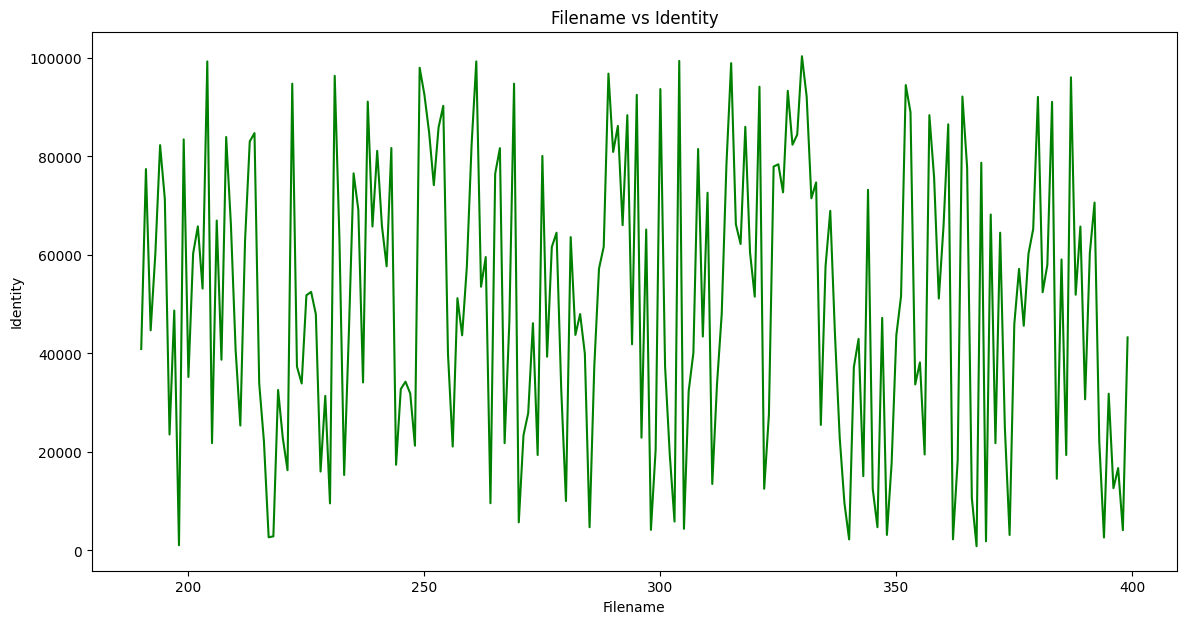

In [ ]:
plt.style.use("default")
plt.figure(figsize=(14,7))
sns.lineplot(x = "FILENAME",y = "IDENTITY",data = train[190:400], color='g')
plt.title("Filename vs Identity")
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

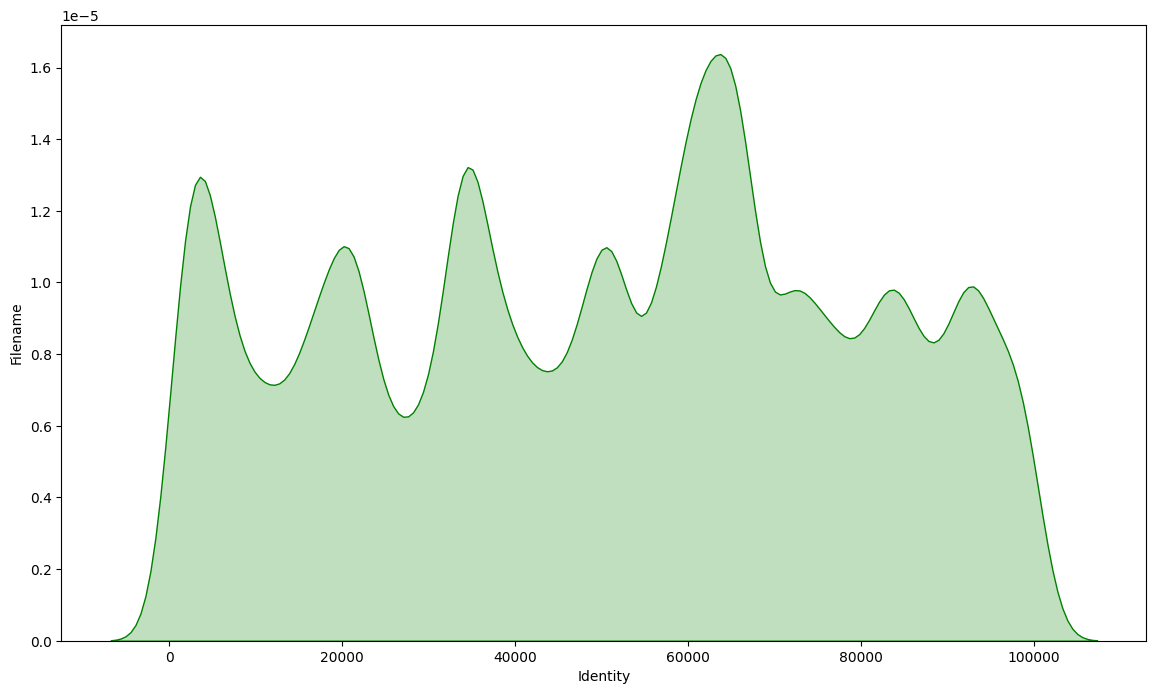

In [ ]:
plt.style.use("default")
plt.figure(figsize=(14,8))
plt.xlabel('Identity')
plt.ylabel('Filename')
sns.kdeplot(train['IDENTITY'],shade=True,color='g')
plt.show()

<Axes: xlabel='FILENAME', ylabel='IDENTITY'>

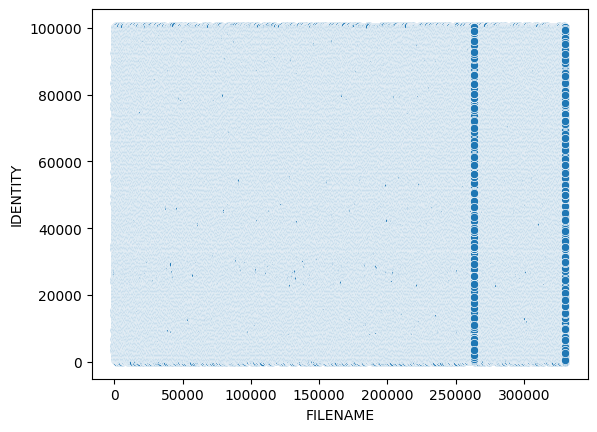

In [ ]:
sns.scatterplot(x='FILENAME',y="IDENTITY",data=train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

231277
99119
231277
99119


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=80,activation='relu',name = 'input_layer'),
      tf.keras.layers.Dense(units=60,activation='relu',name = 'dense_layer1'),
      tf.keras.layers.Dense(units=40,activation='relu',name = 'dense_layer2'),
      tf.keras.layers.Dense(units=1,name='Output_layer')
],name='Model')   # Dropout and Batch Normalization can also be used.



model.compile(
    optimizer='adam',
    loss='binary_crossentropy',        # In loss mae can also be used.
    metrics=['binary_accuracy'],
)


history = model.fit(X_train,y_train,batch_size=256,
    epochs=150,
)


Epoch 1/150
904/904 [==============================] - 5s 3ms/step - loss: 2549278.2500 - binary_accuracy: 0.0000e+00
Epoch 2/150
904/904 [==============================] - 3s 3ms/step - loss: 2549277.0000 - binary_accuracy: 0.0000e+00
Epoch 3/150
904/904 [==============================] - 3s 3ms/step - loss: 2549277.7500 - binary_accuracy: 0.0000e+00
Epoch 4/150
904/904 [==============================] - 4s 4ms/step - loss: 2549277.7500 - binary_accuracy: 0.0000e+00
Epoch 5/150
904/904 [==============================] - 4s 4ms/step - loss: 2549275.7500 - binary_accuracy: 0.0000e+00
Epoch 6/150
904/904 [==============================] - 3s 3ms/step - loss: 2549276.2500 - binary_accuracy: 0.0000e+00
Epoch 7/150
904/904 [==============================] - 3s 3ms/step - loss: 2549275.7500 - binary_accuracy: 0.0000e+00
Epoch 8/150
904/904 [==============================] - 4s 5ms/step - loss: 2549275.5000 - binary_accuracy: 0.0000e+00
Epoch 9/150
904/904 [==============================] - 4

In [ ]:
y_pred = model.predict(X_test)
y_pred

3098/3098 [==============================] - 6s 2ms/step


array([[-1224.2499],
       [-1192.1733],
       [-5153.2954],
       ...,
       [-5708.2275],
       [-4248.9814],
       [-1941.9409]], dtype=float32)

<Axes: >

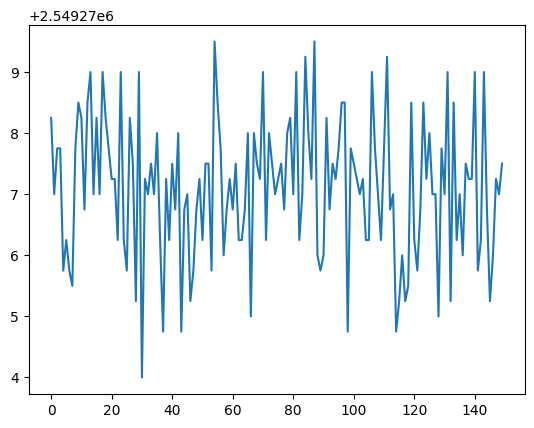

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 80)                160       
                                                                 
 dense_layer1 (Dense)        (None, 60)                4860      
                                                                 
 dense_layer2 (Dense)        (None, 40)                2440      
                                                                 
 Output_layer (Dense)        (None, 1)                 41        
                                                                 
Total params: 7501 (29.30 KB)
Trainable params: 7501 (29.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


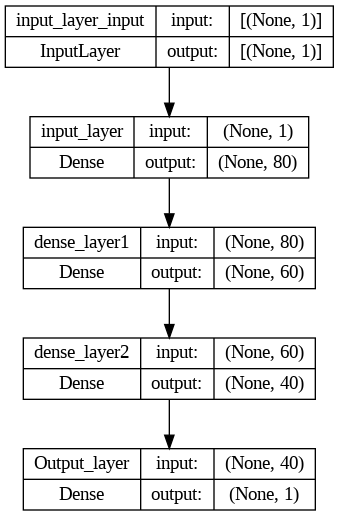

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

Best Validation Loss: 2549274.0000
Best Validation Accuracy: 0.0000


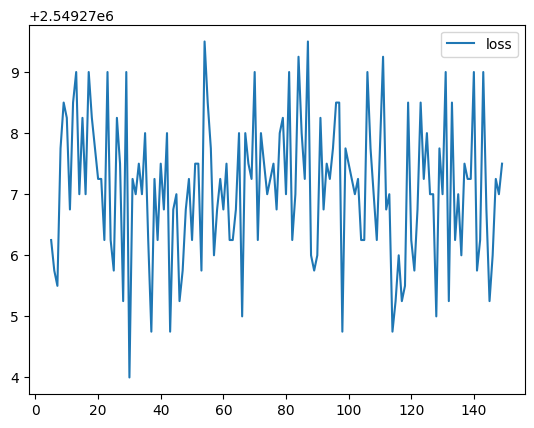

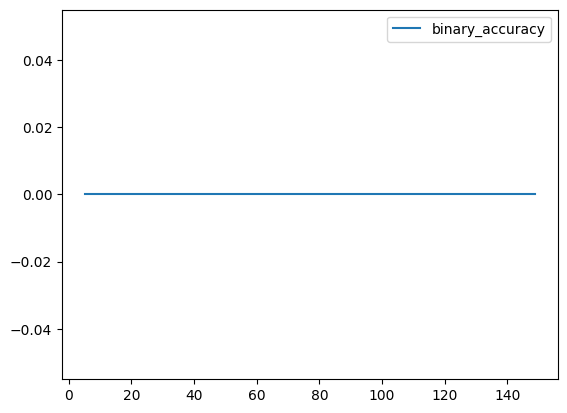

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(),
              history_df['binary_accuracy'].max()))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
model.evaluate(X_test,y_test)

3098/3098 [==============================] - 8s 2ms/step - loss: 2545567.2500 - binary_accuracy: 1.0089e-05


[2545567.25, 1.0088882845593616e-05]